## Project Goal:
### The primary goal of this project is to develop a machine learning model capable of accurately predicting and classifying traffic signs from image data. This involves performing comprehensive image preprocessing to enhance data quality and consistency, followed by the design, training, and evaluation of a predictive model.
## Contribution - Individual


In [ ]:
# Importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from PIL import Image

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
# Extracting the data from a zipped file
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/PRAICP-1002-TrafSignDetc.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_images')



In [ ]:
# length of labels
label_list = os.listdir('/content/extracted_images/Train')
len_file = len(label_list)
print(len_file)

43


In [ ]:
# length of images
img_list = os.listdir('/content/extracted_images/Test')
len_file = len(img_list)
print(len_file)

12631


In [ ]:
img_list[3]

'07382.png'

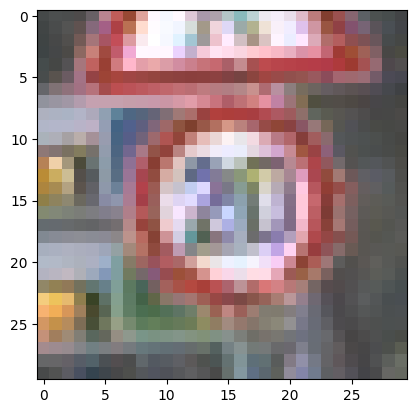

In [ ]:
# Viewing image
import matplotlib.image as mpimg

my_img = mpimg.imread('/content/extracted_images/Train/0/00000_00000_00001.png')
plt.imshow(my_img)

In [ ]:
# assigning train path to join image and labels
Train_img = '/content/extracted_images/Train'
classes = 43 # No. of total classes or labels
data = []
labels = []

In [ ]:
for i in range(classes): #--------------------------------------Looping through each class folder
    path = os.path.join(Train_img, str(i)) #--------------------Building the path to the current class folder
    images = os.listdir(path) #---------------------------------Listing all images in the current folder

    for a in images: #------------------------------------Looping through each image in the folder
        try:
            image = Image.open(os.path.join(path, a)) #---Opening the image
            image = image.resize((30, 30)) #--------------Resize the image to 30x30 pixels

            image = np.array(image) #-----Converting the image to a NumPy array
            data.append(image) #----------Adding the image data to the list
            labels.append(i) #------------Adding the corresponding label to the list
        except Exception as e: #Print any errors that occur
          print(e)

In [ ]:
folders = sorted(os.listdir(Train_img), key=int)
for folder in folders:
    path = os.path.join(Train_img, folder)
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(os.path.join(path, a))
            image = image.resize((30, 30))
            image = np.array(image)

            data.append(image)
            labels.append(int(folder))
        except Exception as e:
            print(f"Error with image {a}: {e}")


TypeError: 'PngImageFile' object is not subscriptable

In [ ]:
# converting list into numpy arrays
data = np.array(data)
labels = np.array(labels)


In [ ]:
# Chacking shape of the data
print(data.shape)
print(labels.shape)

(39209, 30, 30, 3)
(39209,)


In [ ]:
# Normalizing the pixel value
data = np.array(data).astype('float32') / 255

In [ ]:
# Splitting the data for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)


In [ ]:
# Checking the shape of spileted data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31367, 30, 30, 3)
(7842, 30, 30, 3)
(31367,)
(7842,)


In [ ]:
# One-hot encoding the labels
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [ ]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(43, activation='softmax')) # We have 43 classes that's why we have defined 43 in the dense

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 86s 86ms/step - accuracy: 0.3336 - loss: 2.4390 - val_accuracy: 0.9538 - val_loss: 0.1750
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.9082 - loss: 0.2964 - val_accuracy: 0.9819 - val_loss: 0.0624
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.9513 - loss: 0.1649 - val_accuracy: 0.9889 - val_loss: 0.0436
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.9639 - loss: 0.1214 - val_accuracy: 0.9925 - val_loss: 0.0310
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.9701 - loss: 0.0969 - val_accuracy: 0.9934 - val_loss: 0.0264
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.9756 - loss: 0.0798 - val_accuracy: 0.9932 - val_loss: 0.0255
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 80s 81ms/step - accuracy: 0.9783 - loss: 0.0672 - val_accuracy: 0.9940 - val_loss: 0.0270
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.9817 - loss: 0.0591 - 

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step


array([[1.75007155e-08, 2.34926352e-03, 4.11664996e-06, ...,
        1.39194366e-03, 5.76619777e-06, 5.20517318e-08],
       [8.79689896e-32, 2.85493117e-18, 6.21336911e-20, ...,
        1.08544918e-28, 1.21648461e-29, 3.17566626e-30],
       [1.07000005e-20, 3.22886114e-17, 2.47183442e-15, ...,
        4.19577647e-22, 8.85260509e-26, 7.20150146e-21],
       ...,
       [1.00103398e-10, 1.60385680e-11, 9.79019247e-14, ...,
        4.40598404e-13, 2.09013731e-14, 1.91771403e-18],
       [3.25635861e-17, 1.05978594e-12, 1.82023336e-15, ...,
        3.99638344e-14, 9.82139469e-26, 4.13482829e-21],
       [3.24514644e-07, 4.36373256e-07, 1.10908016e-09, ...,
        1.41807521e-09, 7.61014803e-15, 6.55077042e-18]], dtype=float32)

In [ ]:
# Making function to prepare test images from Test folder
def testing(testcsv):
    y_test = pd.read_csv(testcsv)  # Reading test CSV file
    label = y_test["ClassId"].values  # Geting labels
    imgs = y_test["Path"].values  # Geting image paths

    data = []  # List to store images

    for img in imgs:
      img_name = os.path.basename(img)  # Extracting only the image file name
      full_img_path = os.path.join('/content/extracted_images/Test', img_name)  # Constructing the correct full path
      image = Image.open(full_img_path)  # Opening image
      image = image.resize((30, 30))  # Resizing image
      data.append(np.array(image))  # Converting to array and add to list

    X_test = np.array(data)  # Converting list to NumPy array

    return X_test, label  # Return images and labels

In [ ]:
import pandas as pd

In [ ]:
# Calling function and loading test images and labels
X_test, label = testing('/content/Test.csv')

In [ ]:
# 1. Get predictions
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# 2. Calculate accuracy
accuracy = accuracy_score(label, Y_pred_classes)

print("Test Accuracy:", accuracy)

395/395 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step
Test Accuracy: 0.9557403008709422


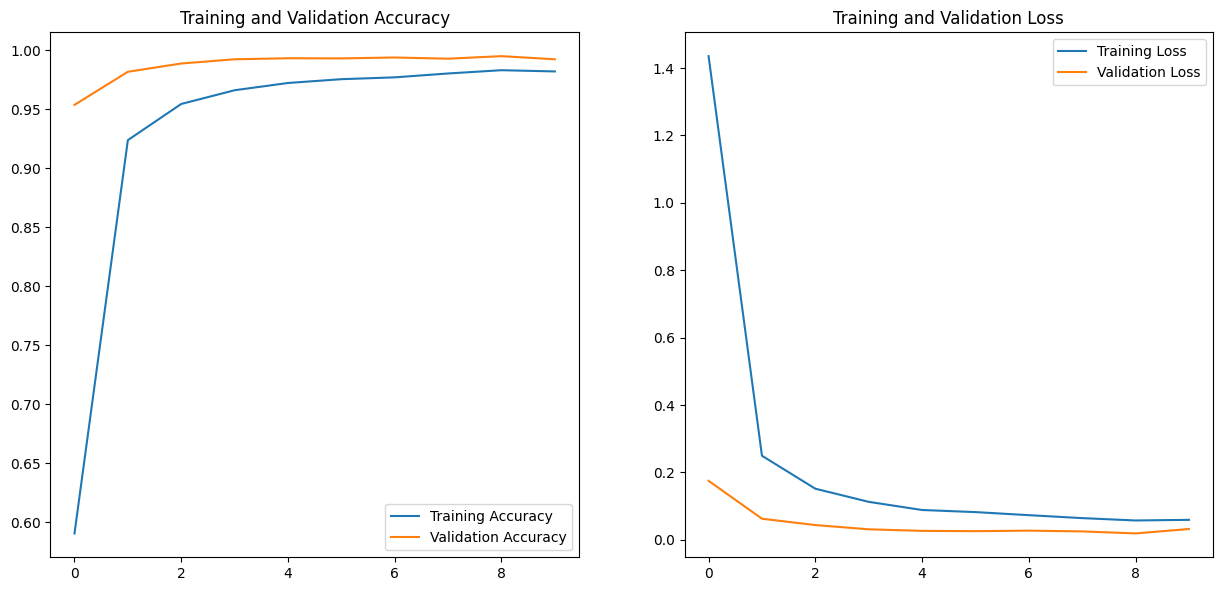

In [ ]:
# Extracting accuracy and loss values from the training history
acc = history.history['accuracy'] # Training accuracy
val_acc = history.history['val_accuracy'] # Validation accuracy
loss = history.history['loss'] # Training loss
val_loss = history.history['val_loss'] # Validation loss

epochs_range = range(10)
# Plot Training and Validation Accuracy
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()